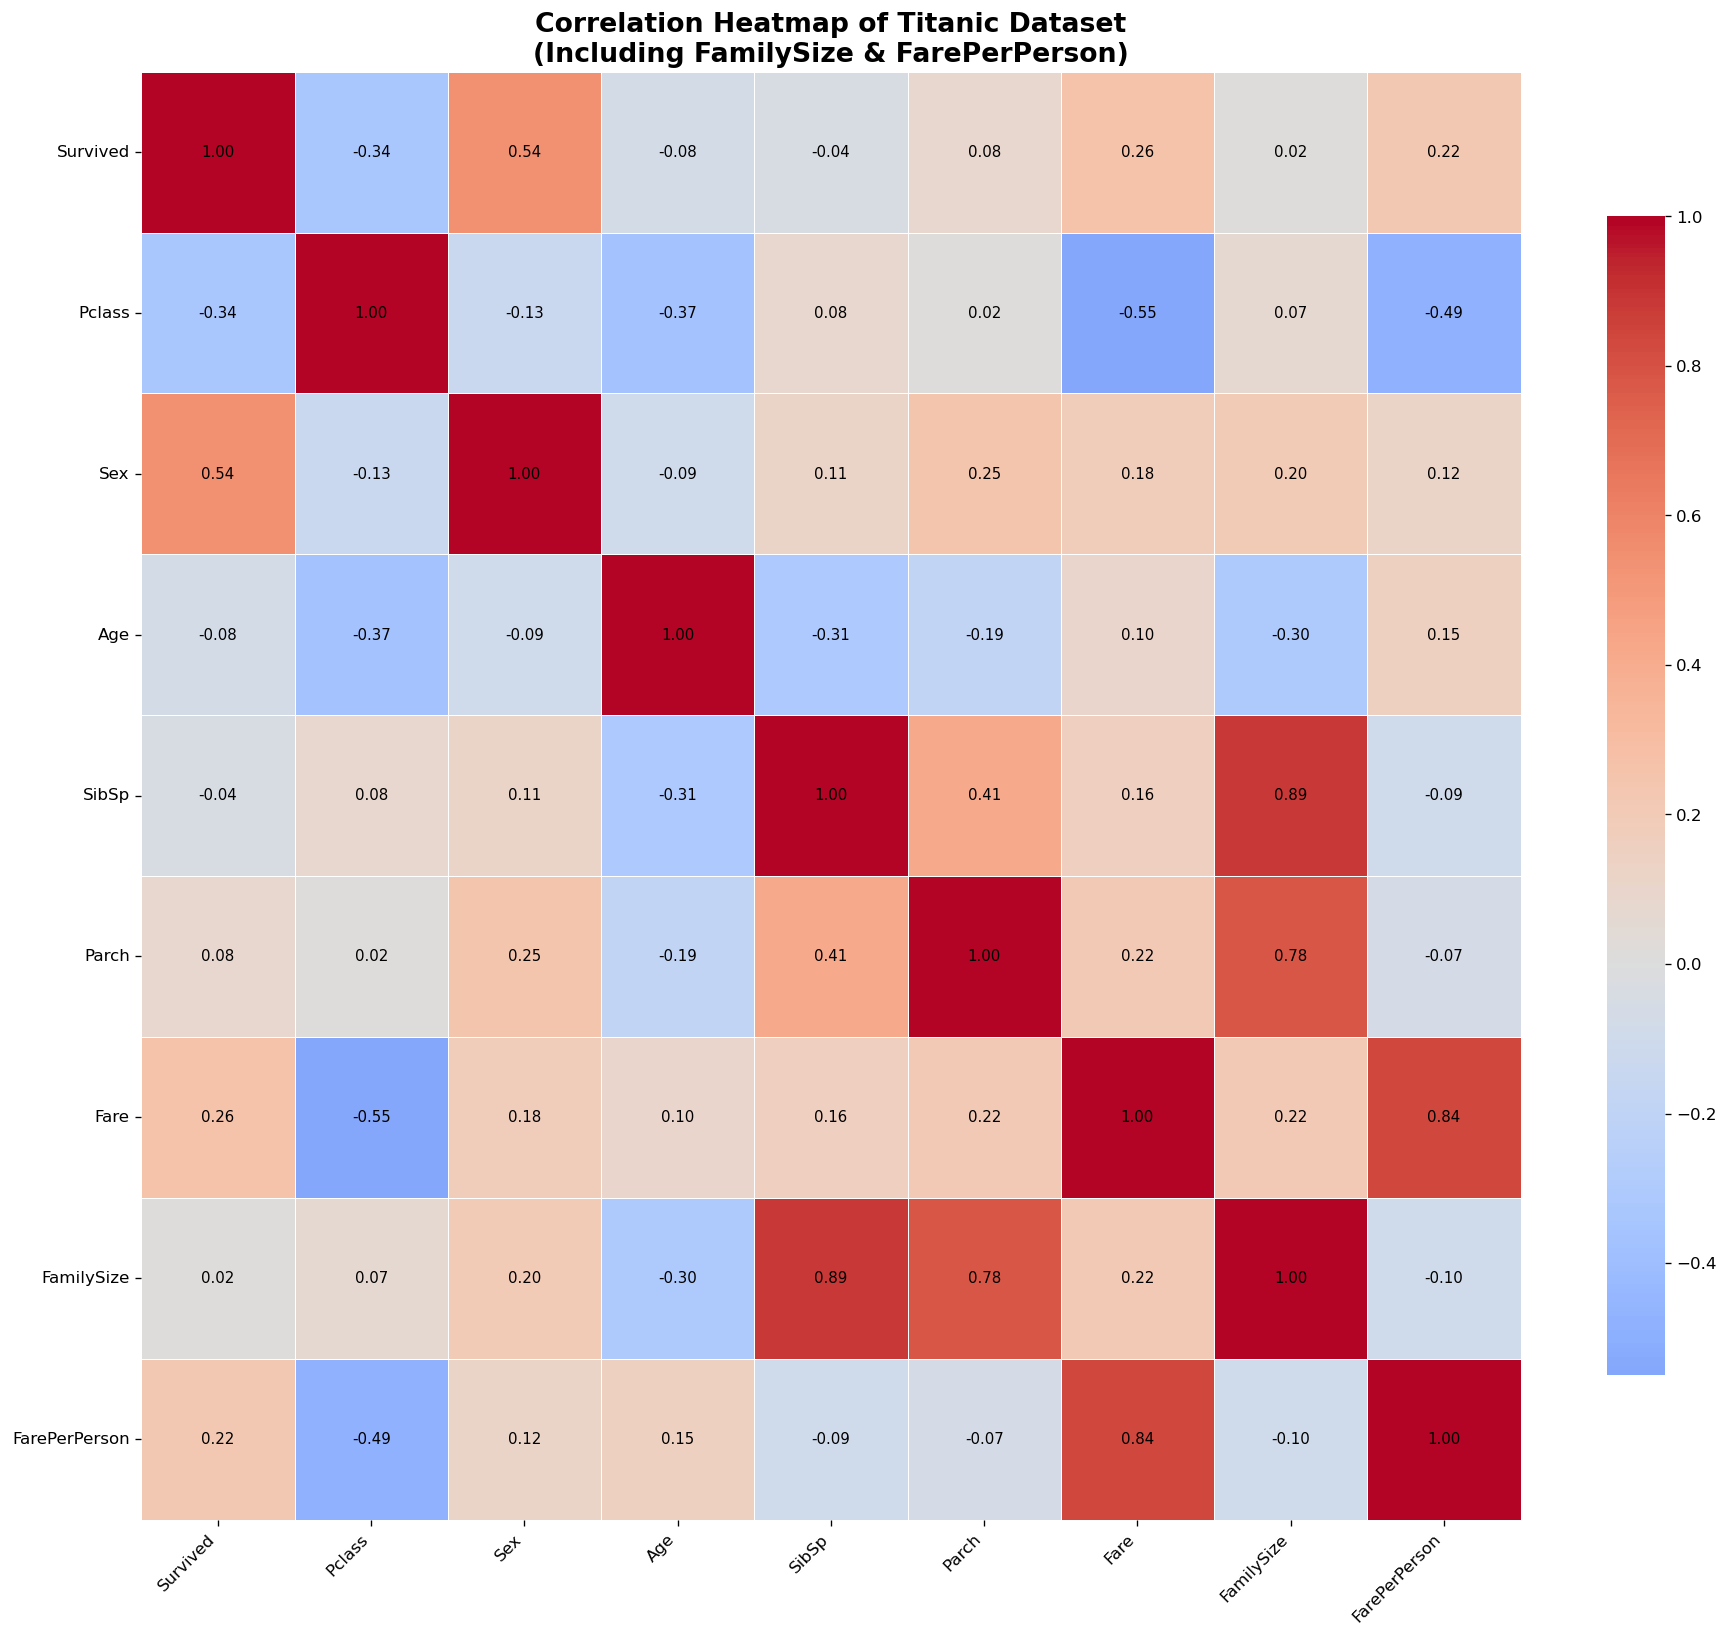

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Titanic-Dataset.csv'

df = pd.read_csv(file_path)

df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FarePerPerson"] = df["Fare"] / df["FamilySize"]

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = df.drop(columns=["PassengerId"])

numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 120
# Plot heatmap WITH DECIMAL VALUES
plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=False,              
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 9, "color": "black"}
)

plt.title(
    "Correlation Heatmap of Titanic Dataset\n(Including FamilySize & FarePerPerson)",
    fontsize=16,
    fontweight="bold"
)

plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout(pad=2)
plt.show()